## Coding sprint (15/12)
## Task:
Predict 'Total alcohol consumption per capita (liters of pure alcohol, projected estimates, 15+ years of age)' from other World development indicators
https://datacatalog.worldbank.org/home

### Group 1
https://pypi.org/project/wbgapi/
1. Access world bank data via python API, wbgapi
2. Get the alcohol indicator, and search other indicators (year 2019)
3. Your final product is pandas DataFrame containing 10 relevant indicators of your choice

### Group 2
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html
1. Your input is the DF from the above
2. Solve the problem with missing values (what are you going to do? substitute, invent a value, ignore a country?)
3. Find 5 best candidate predictors of the alcohol comsuption out of the 10 in the table

### Group 3
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
1. Your input is Dataframe with 5 predictors (features) and target alcohol column.
2. Split the data into train and test.
3. prepare a linear regression model (scikit learn LinearRegression()) to fit the data
5. Find evaluation metrics of the model.
6. Predict the test data. How is the performance between train and test?

In [52]:
import wbgapi as wb
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn

In [39]:
# help(wb.series)

In [40]:
wb.search('alcohol')

ID,Name,Field,Value
EG.CFT.ACCS.RU.ZS,,Statisticalconceptandmethodology,"...fuels, electricity, as well as an aggregation of any other clean fuels like alcohol) are produced by aggregating estimates of relevant fuel types. The model was..."
EG.CFT.ACCS.UR.ZS,,Statisticalconceptandmethodology,"...fuels, electricity, as well as an aggregation of any other clean fuels like alcohol) are produced by aggregating estimates of relevant fuel types. The model was..."
EG.CFT.ACCS.ZS,,Statisticalconceptandmethodology,"...fuels, electricity, as well as an aggregation of any other clean fuels like alcohol) are produced by aggregating estimates of relevant fuel types. The model was..."
SH.ALC.PCAP.FE.LI,,Developmentrelevance,"...Acoording to the World Health Organization, alcohol consumption is a causal factor in more than 200 disease and injury conditions...."
SH.ALC.PCAP.FE.LI,,IndicatorName,"Total alcohol consumption per capita, female (liters of pure alcohol, projected estimates, female 15+ years of age)"
SH.ALC.PCAP.FE.LI,,Longdefinition,...Total alcohol per capita consumption is defined as the total (sum of recorded and unrecorded...
SH.ALC.PCAP.FE.LI,,Statisticalconceptandmethodology,...The estimates for the total alcohol consumption are produced by summing up the 3-year average per capita (15+)...
SH.ALC.PCAP.LI,,Developmentrelevance,"...Acoording to the World Health Organization, alcohol consumption is a causal factor in more than 200 disease and injury conditions...."
SH.ALC.PCAP.LI,,IndicatorName,"Total alcohol consumption per capita (liters of pure alcohol, projected estimates, 15+ years of age)"
SH.ALC.PCAP.LI,,Longdefinition,...Total alcohol per capita consumption is defined as the total (sum of recorded and unrecorded...


In [ ]:
wb.series.info(q='alcohol')

In [33]:
df = wb.data.DataFrame(['SH.ALC.PCAP.LI', 'SP.POP.TOTL'], labels=True, time=2019).reset_index()

In [41]:
df

,economy,Country,SH.ALC.PCAP.LI,SP.POP.TOTL
0,ZWE,Zimbabwe,3.628090,15354608.0
1,ZMB,Zambia,3.851760,18380477.0
2,YEM,"Yemen, Rep.",0.027780,31546691.0
3,PSE,West Bank and Gaza,NaN,4685306.0
4,VIR,Virgin Islands (U.S.),NaN,106669.0
...,...,...,...,...
261,CEB,Central Europe and the Baltics,12.554616,102398537.0
262,CSS,Caribbean small states,5.283409,7424102.0
263,ARB,Arab World,0.358012,441467739.0
264,AFW,Africa Western and Central,4.256345,454306063.0


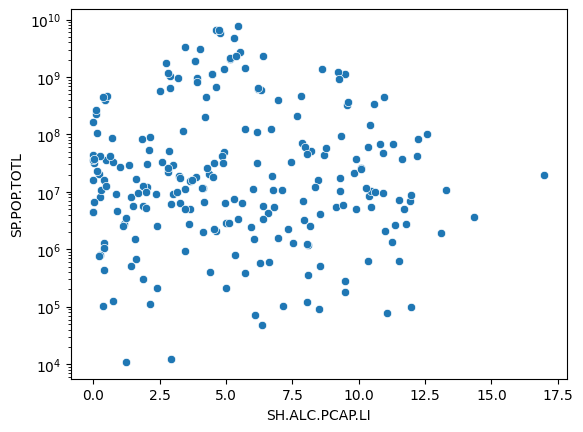

In [46]:
sns.scatterplot(data=df, x='SH.ALC.PCAP.LI', y='SP.POP.TOTL')
plt.yscale('log')

In [51]:
df[['SH.ALC.PCAP.LI', 'SP.POP.TOTL']].corr()

,SH.ALC.PCAP.LI,SP.POP.TOTL
SH.ALC.PCAP.LI,1.000000,-0.033006
SP.POP.TOTL,-0.033006,1.000000
